In [1]:
import sys
sys.path.append("../src")
import pandas as pd
from cleaning import *
from outliers import *

# Example: Apple stock
df = preprocess("AAPL", raw_path="../data/raw", out_path="../data/processed")

# Detect outliers on volume
df["is_outlier"] = detect_outliers_iqr(df, "volume")

print("Outlier ratio:", df["is_outlier"].mean())

# Compare summary stats
df_clean = remove_outliers(df, "volume")

print("\n--- With Outliers ---")
print(df["volume"].describe())

print("\n--- Without Outliers ---")
print(df_clean["volume"].describe())

Saved cleaned data for AAPL → ../data/processed/AAPL_clean.csv
Outlier ratio: 0.07385229540918163

--- With Outliers ---
count    5.010000e+02
mean     5.707950e+07
std      2.652177e+07
min      2.323470e+07
25%      4.284893e+07
50%      5.132640e+07
75%      6.254747e+07
max      3.186799e+08
Name: volume, dtype: float64

--- Without Outliers ---
count    4.640000e+02
mean     5.150225e+07
std      1.287272e+07
min      2.323470e+07
25%      4.230562e+07
50%      4.967003e+07
75%      5.898625e+07
max      9.191282e+07
Name: volume, dtype: float64


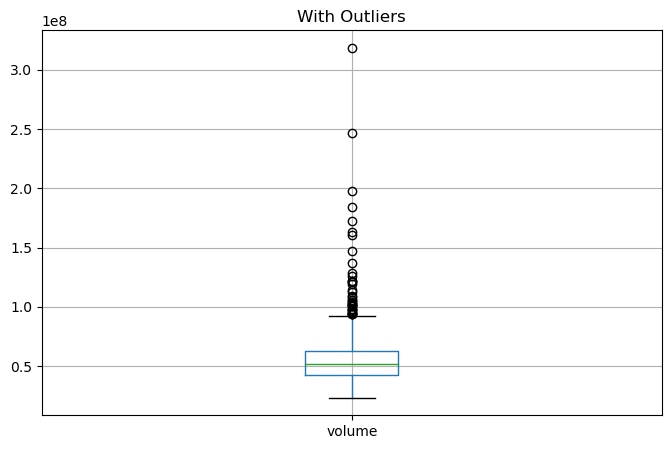

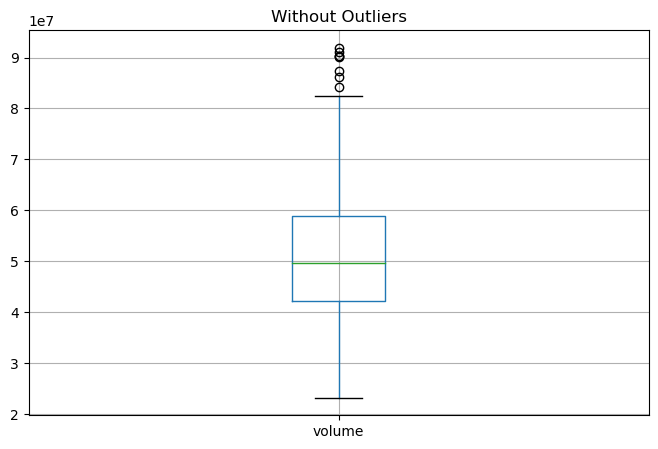

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df[["volume"]].boxplot()
plt.title("With Outliers")
plt.show()

plt.figure(figsize=(8,5))
df_clean[["volume"]].boxplot()
plt.title("Without Outliers")
plt.show()
